# Agents

Agents are composed of body parts and sensors.
We will use an already implemented agent composed of a Base and a Head.

We are going to attach sensors to this agent.

In [1]:
from simple_playgrounds import Engine
from simple_playgrounds.controllers import Keyboard
from simple_playgrounds.entities.agents import BaseAgent, BaseInteractiveAgent

# to display the sensors
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Linux (64bit) [/usr/local/lib/python3.6/dist-packages/pymunk/libchipmunk.so]


In [2]:
from environments.rl import EndgoalRoomCue, DispenserEnv, CoinMaster
from simple_playgrounds.entities.agents.sensors import RgbSensor, TouchSensor, DepthSensor

my_playground = CoinMaster()
my_agent = BaseInteractiveAgent(initial_position=(100, 20, 1.15), controller=Keyboard())
my_playground.add_agent(my_agent)

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=1000000, playground= my_playground, screen=True, replay=True)

my_agent.add_sensor(RgbSensor(my_agent.base_platform))
my_agent.add_sensor(DepthSensor(my_agent.base_platform))
my_agent.add_sensor(TouchSensor(my_agent.base_platform))

while engine.game_on:
    
    engine.display_full_scene()

    actions = {}
    for agent in engine.agents:
        actions[agent.name] = agent.controller.generate_actions()

    reset, terminate = engine.step(actions)
    engine.update_observations()
    
    cv2.imshow('sensor', engine.generate_sensor_image(my_agent))
    cv2.waitKey(20)
    
    if reset:
        engine.reset()
    if terminate:
        engine.terminate()
    
engine.terminate()
cv2.destroyAllWindows()


## Funny addition

Sensors are quite generic, so we could in principle add one to a scene element.
It would act as a camera, that the agent has access to.

Here, we add a sensor to an object which is graspable.

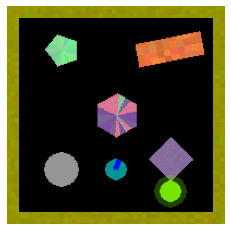

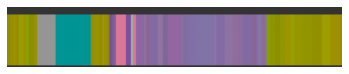

In [6]:
from simple_playgrounds.entities.agents import BaseInteractiveAgent

my_playground = Basics()
my_agent = BaseAgent(initial_position=(100, 50, 1.15), controller=Keyboard())
my_playground.add_agent(my_agent)

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=1000000, playground= my_playground, screen=True)

circular_object = Basic((150, 30, 1.8), physical_shape='circle', radius=10, texture = [120, 230, 0], graspable = True, mass=5)
my_playground.add_scene_element(circular_object)

camera = RgbSensor(circular_object)
my_agent.add_sensor(camera)

plt_image(engine.generate_topdown_image(mode='plt'))

engine.update_observations()
img_sensor = engine.generate_sensor_image(my_agent, mode='plt')
plt_image(img_sensor)



while engine.game_on:
    
    engine.display_full_scene()

    actions = {}
    for agent in engine.agents:
        actions[agent.name] = agent.controller.generate_actions()

    reset, terminate = engine.step(actions)
    engine.update_observations()
    
    cv2.imshow('sensor', engine.generate_sensor_image(my_agent))
    cv2.waitKey(20)
    
    if reset:
        engine.reset()
    if terminate:
        engine.terminate()
    
engine.terminate()
cv2.destroyAllWindows()


You now see the agent from the point of view of the green object.